<div style="background-color: lightgreen; padding: 10px; border-radius: 5px;">
    <p style="margin: 10;"></p>
    <h1 style="text-align: center; margin: 0;">Computing Wavenumber spectra from SWOT SSH L3 data during the CalVal period</h1>
    <p style="margin: 10;"></p>
</div>

***

***
<br>

## **Introduction** 🌊
In this notebook, we present a demonstration of how to use widetrax to calculate wavenumber spectra using SWOT L3 data.

The main objectives of this notebook are to:

1. Load SWOT satellite datasets stored in an S3 bucket.
2. Filter and process the data for a specific region and time period.
3. Handle and Interpolate Potential NaN Values.
3. Compute Wavenumber spectra.

## ✨ **Before starting** ✨

Before running this notebook, make sure you have already installed the following libraries:

1. **pyinterp**: [Installation Guide](https://cnes.github.io/pangeo-pyinterp/setup.html)  
2. **widetrax**: [Installation Guide](https://widetrax.readthedocs.io/en/latest/overview.html#installation)  

**Note**: `widetrax` will not work if **pyinterp** is not installed.


## **Imports/Libraries** 📦

In [9]:
import pyinterp
from widetrax import DataPreprocessing as dp
from widetrax import Spectra as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Required variables** 🧮

Please select the desired time period, ensuring it falls between 01-04-2023 and 10-07-2023.  
Preferably, choose a period of 15/30 days to optimize loading time and ensure quicker data processing.

In [2]:
lon_min, lon_max, lat_min, lat_max = 333.5, 341.5, 32, 40
area = [lon_min, lat_min, lon_max, lat_max]
start_date = "01052023"
end_date ="10052023"
base_s3_folder = "project-meom-ige/SWOT_L3_V1_0"  
endpoint_url = "https://minio.lab.dive.edito.eu" 

## **Identify the cycle numbers within the specified time range** 🔄

In [3]:
file_path = "https://minio.lab.dive.edito.eu/project-meom-ige/cycles_periods.csv"
matching_cycles = dp.get_matching_cycles(file_path, start_date, end_date)
matching_cycles

['507', '508', '509', '510', '511', '512', '513', '514', '515', '516']

## **Load datasets** 

In [4]:
%%time
# Load datasets into a dictionary
datasets_dict = dp.read_swot_ncfiles_S3subfolders(
    base_s3_folder,
    matching_cycles,
    endpoint_url,
    area)

507_005 included.
Error processing file 507_013: [Errno 5] An error occurred (407) when calling the GetObject operation: Proxy Authentication Required
507_018 included.
Error processing file 508_003: [Errno 5] An error occurred (407) when calling the GetObject operation: Proxy Authentication Required
508_005 included.
508_018 included.
Error processing file 508_021: [Errno 5] An error occurred (407) when calling the GetObject operation: Proxy Authentication Required
509_005 included.
Error processing file 509_011: [Errno 5] An error occurred (407) when calling the GetObject operation: Proxy Authentication Required
509_018 included.
Error processing cycle 510: [Errno 5] An error occurred (407) when calling the ListObjectsV2 operation: Proxy Authentication Required
511_005 included.
Error processing file 511_017: [Errno 5] An error occurred (407) when calling the GetObject operation: Proxy Authentication Required
511_018 included.
Error processing file 512_006: [Errno 5] An error occurre

In [5]:
# Sort data by time
sorted_datasets = dp.sort_datasets_by_time(datasets_dict)

## **Handling and Interpolating Potential NaN Values 🛠️**

In [6]:
%%time
has_converged, filled_datasets = dp.fill_nan(sorted_datasets)

CPU times: user 366 ms, sys: 1.15 s, total: 1.51 s
Wall time: 1.87 s


## **Extract Segments ✂️**

In [7]:
%%time
segments_dict = sp.retrieve_segments(filled_datasets,FileType = "NetCDF")

CPU times: user 192 ms, sys: 30 µs, total: 192 ms
Wall time: 195 ms


## **Compute Wavenumber spectra 📊**

In [8]:
%%time
psd_dict, freqs_dict = sp.calculate_psd(segments_dict)
# Calculate PSD Mean
psd_mean, freqs_mean = sp.psd_mean_and_freq(psd_dict,freqs_dict)

CPU times: user 233 ms, sys: 2 s, total: 2.23 s
Wall time: 4.45 s


## **Plot 📉**

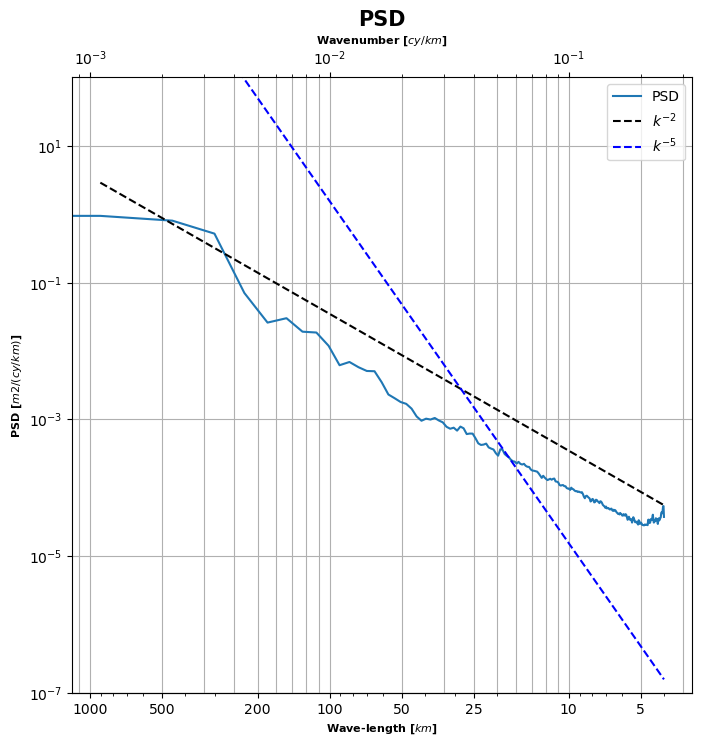

In [10]:
fig, ax_ = plt.subplots(1, 1, figsize=(8, 8))
sp.plot_psd(ax_, freqs_mean, psd_mean, unit = "m2",psd_labels="PSD",title="PSD",savefig=True,filename="psd_1.png",plot_transparent=True)